----
# Laboratorium 4 - Własności widmowe obrazów
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej  

----
## 0. Zagadnienia do opanowania przed zajęciami
----
### 0.1. Obsługa języka Python oraz bibliotek `numpy`, `matplotlib` oraz `imageio`.
### 0.2. Budowa obrazu 
- rozdzielczość,
- komponenty składowe,
- przechowywanie obrazu w pamięci (rozmiar bitowy próbki, format `.bmp`).  
### 0.3. Analiza widmowa obrazów.

Literatura:
- M. Domański, Obraz cyfrowy, Wydawnictwo  WKŁ, Warszawa 2011
- D. Karwowski: Zrozumieć kompresję, Poznań 2019

In [1]:
#imported modules
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import imageio

#global variables
default_figsize     = 5
default_figsize_2x2 = [2*default_figsize, 2*default_figsize]
default_figsize_3x3 = [3*default_figsize, 3*default_figsize]
default_figsize_1x2 = [2*default_figsize, default_figsize]
default_figsize_1x3 = [3*default_figsize, default_figsize] 

### Zadanie A:  
Wyczytaj obrazy 'lena.png' i 'boats.png'. Sprawdź rozmiary macierzy, w których przechwywane są dane oraz ich typ.  

Następnie Wyświetl na jednym wykresie (`subplot` lub `subplots`) obydwa obrazy w skali szarości (argumenty $cmap$, $vmin$ i $vmax$ funkcji `imshow`).

Lena dimensions: (512, 512), dtype: uint8
Boats dimensions: (512, 512), dtype: uint8


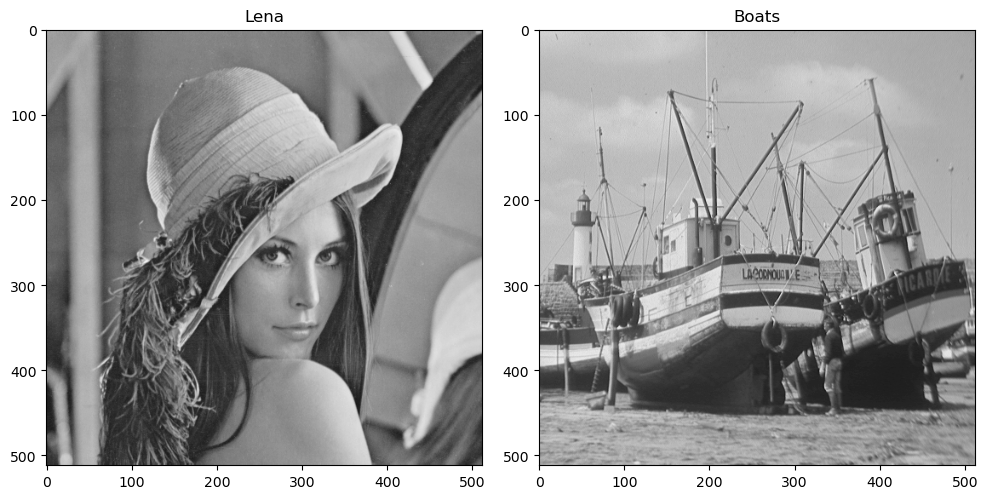

In [3]:
#load images, check dimensions and data type
# Load images
lena = imageio.imread('lena.png')
boats = imageio.imread('boats.png')

# Check dimensions and data type
print(f"Lena dimensions: {lena.shape}, dtype: {lena.dtype}")
print(f"Boats dimensions: {boats.shape}, dtype: {boats.dtype}")

# Display images
fig, axs = plt.subplots(1, 2, figsize=default_figsize_1x2)
axs[0].imshow(lena, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Lena')
axs[1].imshow(boats, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Boats')
fig.tight_layout()
#fig.show() 


### Zadanie B:  
* Wyznacz widmo amplitudowe i fazowe obrazu 'boats.png' (wykorzystaj funkcję `numpy.fft.fft2`).
* Do wyznaczenia poszczególnych widm znajdz w bibliotece $numpy$ funkcje odpowiedzalne za wyznaczenie wartości bezwzględnej, logarytmu oraz konta fazowego.
* W jednym oknie wyświetl widmo amplitudowe, widmo amplitudowe w skali logarytmicznej oraz widmo fazowe, wszystkie w skali szarości (podaj odpowiednie dane do funkcji imshow). Aby ułatwić analizę wyznaczonych widm zastosuj, przed wyświetleniem, przesunięcie współczynnika F(0,0) na środek wyświetlanego obrazu (wykorzystaj funkcję `numpy.fft.fftshift`)

Wskazówka: Aby uniknąć problemu wyznaczania logarytmu z wartości 0, dodaj wartość `numpy.finfo(np.float64).eps` do próbek widma. 

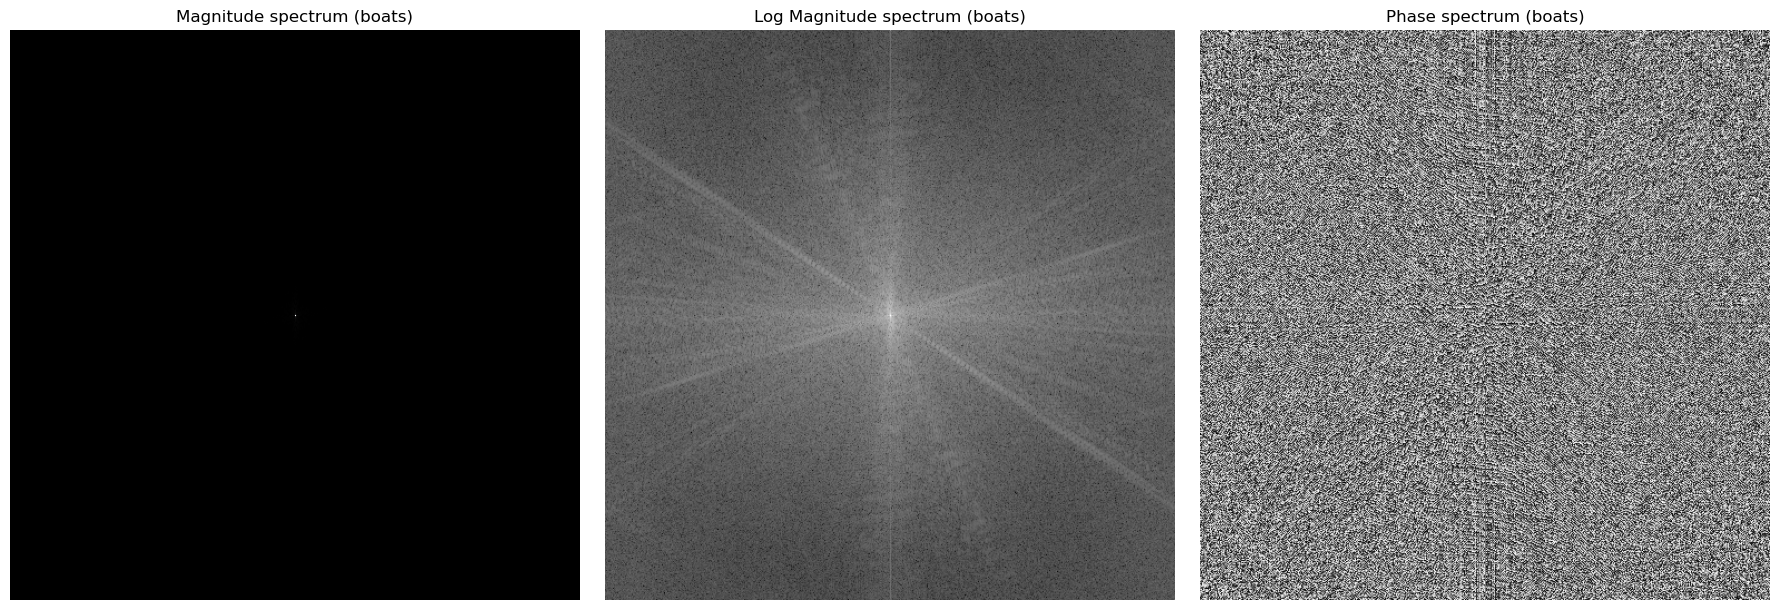

In [5]:
def calculateSpectrums(image):
    # Obliczenie transformaty Fouriera obrazu
    f_transform = np.fft.fft2(image)
    
    # Przesunięcie zerowej częstotliwości na środek obrazu
    f_transform_shifted = np.fft.fftshift(f_transform)
    
    # Widmo amplitudowe (moduł transformaty)
    magnitude = np.abs(f_transform_shifted)
    
    # Logarytmiczne widmo amplitudowe
    magnitude_log = np.log(magnitude + np.finfo(np.float64).eps)
    
    # Widmo fazowe
    phase = np.angle(f_transform_shifted)
    
    return magnitude, magnitude_log, phase

# Wczytanie obrazu 'boats.png'
boats_image =  imageio.imread("boats.png") # konwersja do skali szarości
boats = np.array(boats_image)

# Wyznaczenie widm dla obrazu 'boats'
magnitude_boats, magnitude_log_boats, phase_boats = calculateSpectrums(boats)

# Wyświetlanie widm
figDFT, axsDFT = plt.subplots(1, 3, figsize=(18, 6))

# Wyświetlanie widma amplitudowego
axsDFT[0].imshow(magnitude_boats, cmap=plt.cm.gray)
axsDFT[0].set_title("Magnitude spectrum (boats)")
axsDFT[0].axis('off')

# Wyświetlanie logarytmicznego widma amplitudowego
axsDFT[1].imshow(magnitude_log_boats, cmap=plt.cm.gray)
axsDFT[1].set_title("Log Magnitude spectrum (boats)")
axsDFT[1].axis('off')

# Wyświetlanie widma fazowego
axsDFT[2].imshow(phase_boats, cmap=plt.cm.gray)
axsDFT[2].set_title("Phase spectrum (boats)")
axsDFT[2].axis('off')

# Ustawienie układu
figDFT.tight_layout()
plt.show()

### Zadanie C:  
* Napisz funkcję, która rekonstruuje obraz z jego widma (wykorzystaj funkcję `numpy.fft.ifft2`). Funkcja jako argumenty przyjmuje widmo amplitudowe (LINIOWE!!!) i fazowe obrazu. 
* W jednym oknie wyświetl obraz oryginalny i zrekonstruowany, obydwa w skali szarości (argumenty $cmap$, $vmin$ i $vmax$ funkcji `imshow`). Dodaj odpowiednie tytuły do wykresów. 
* Sprawdź numerycznie, czy obrazy są identyczne (znajdz maksymalną różnicę w wartościach próbek oryginału i rekonstrukcji).

Wskazówki:
* Rekonstrukję widma zespolonego można wykonać wykorzystując jedną z postaci liczby zespolonej. 
* Pamiętaj, aby zrekonstruowany obraz miał odpowiedni format danych (`uint8` - funkcje obiektów numpy - `.astype()`, `.round()`, `numpy.clip`). 

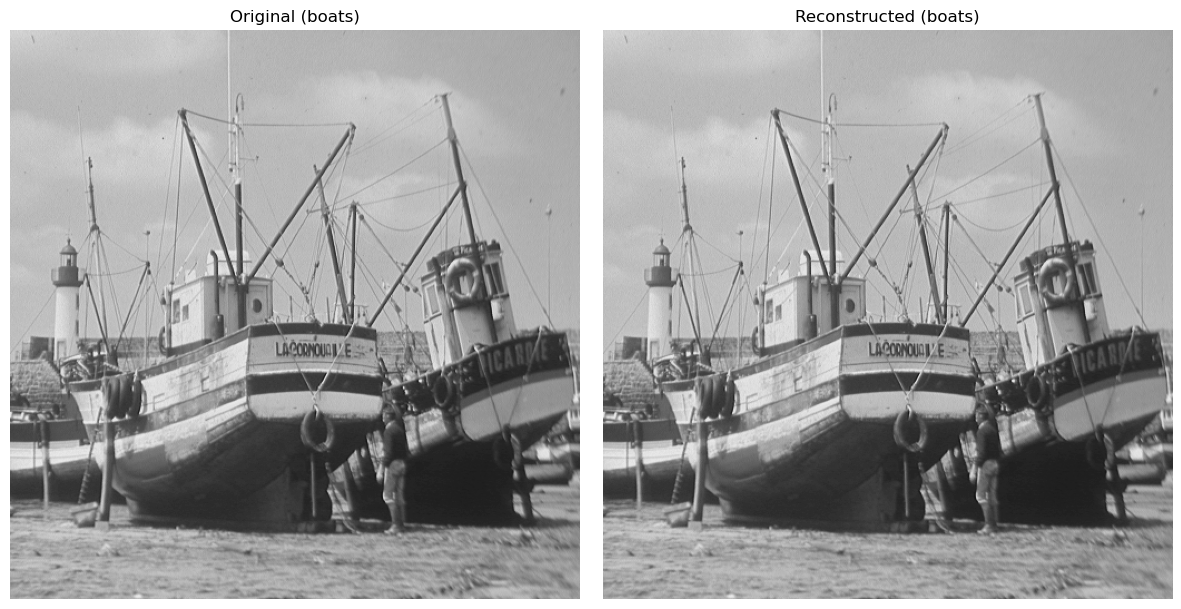

Maksymalna różnica między oryginałem a rekonstrukcją: 0


In [8]:
def reconstruction_from_spectrum(magnitude_spectrum, phase_spectrum):
    # Zrekonstruowanie widma zespolonego: amplituda * exp(i * faza)
    real_part = magnitude_spectrum * np.cos(phase_spectrum)
    imag_part = magnitude_spectrum * np.sin(phase_spectrum)
    
    # Tworzymy zespolone widmo
    complex_spectrum = real_part + 1j * imag_part
    
    # Obliczenie odwrotnej transformaty Fouriera
    rec_image = np.fft.ifft2(complex_spectrum)
    
    # Upewnienie się, że wynik jest w formacie uint8 (obraz w skali szarości)
    rec_image = np.abs(rec_image)  # Tylko część rzeczywista
    rec_image = np.round(rec_image).astype(np.uint8)  # Zaokrąglanie i konwersja na uint8
    rec_image = np.clip(rec_image, 0, 255)  # Zapewnienie, że wartości są w zakresie [0, 255]
    
    return rec_image

# Wczytanie obrazu 'boats.png'
boats_image = imageio.imread("boats.png") # konwersja do skali szarości
boats = np.array(boats_image)

# Wyznaczenie widm dla obrazu 'boats'
magnitude_boats, magnitude_log_boats, phase_boats = calculateSpectrums(boats)

# Rekonstrukcja obrazu z widma
rec_boats = reconstruction_from_spectrum(magnitude_boats, phase_boats)

# Wyświetlanie wyników
figREC, axsREC = plt.subplots(1, 2, figsize=(12, 6))

# Wyświetlanie obrazu oryginalnego
axsREC[0].imshow(boats, cmap=plt.cm.gray, vmin=0, vmax=255)
axsREC[0].set_title("Original (boats)")
axsREC[0].axis('off')

# Wyświetlanie obrazu zrekonstruowanego
axsREC[1].imshow(rec_boats, cmap=plt.cm.gray, vmin=0, vmax=255)
axsREC[1].set_title("Reconstructed (boats)")
axsREC[1].axis('off')

figREC.tight_layout()
plt.show()

# Porównanie wyników numerycznych
diff = np.max(np.abs(boats - rec_boats))
print("Maksymalna różnica między oryginałem a rekonstrukcją:", diff)


### Zadanie D:  
Powtórz zadanie B dla obrazu 'lena.png'. Zapisz widmo amplitudowe i fazowe do nowych zmiennych. Pamiętaj o dodaniu przesunięcia (`numpy.fft.fftshift`)

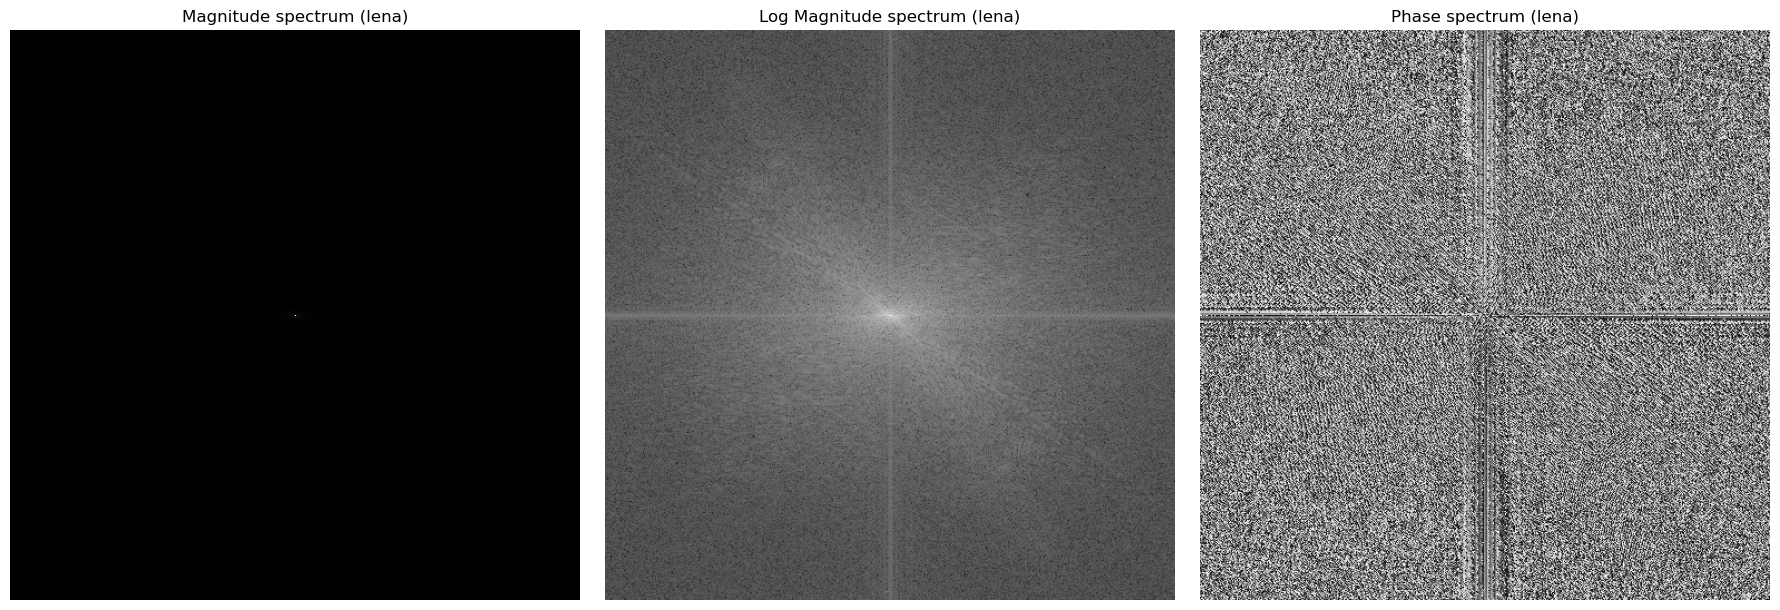

In [10]:
def calculateSpectrums(image):
    # Obliczenie transformaty Fouriera obrazu
    f_transform = np.fft.fft2(image)
    
    # Przesunięcie zerowej częstotliwości na środek obrazu
    f_transform_shifted = np.fft.fftshift(f_transform)
    
    # Widmo amplitudowe (moduł transformaty)
    magnitude = np.abs(f_transform_shifted)
    
    # Logarytmiczne widmo amplitudowe
    magnitude_log = np.log(magnitude + np.finfo(np.float64).eps)
    
    # Widmo fazowe
    phase = np.angle(f_transform_shifted)
    
    return magnitude, magnitude_log, phase

# Wczytanie obrazu 'lena.png'
lena_image = imageio.imread("lena.png")
lena = np.array(lena_image)

# Wyznaczenie widm dla obrazu 'lena'
magnitude_lena, magnitude_log_lena, phase_lena = calculateSpectrums(lena)

# Wyświetlanie widm dla obrazu 'lena'
figDFT, axsDFT = plt.subplots(1, 3, figsize=(18, 6))

# Wyświetlanie widma amplitudowego
axsDFT[0].imshow(magnitude_lena, cmap=plt.cm.gray)
axsDFT[0].set_title("Magnitude spectrum (lena)")
axsDFT[0].axis('off')

# Wyświetlanie logarytmicznego widma amplitudowego
axsDFT[1].imshow(magnitude_log_lena, cmap=plt.cm.gray)
axsDFT[1].set_title("Log Magnitude spectrum (lena)")
axsDFT[1].axis('off')

# Wyświetlanie widma fazowego
axsDFT[2].imshow(phase_lena, cmap=plt.cm.gray)
axsDFT[2].set_title("Phase spectrum (lena)")
axsDFT[2].axis('off')

# Ustawienie układu
figDFT.tight_layout()
plt.show()

### Zadanie E:  
Zrekonstruuj dwa nowe obrazy, wykorzystując:
* widmo amplitudowe obrazu 'lena' oraz widmo fazowe obrazu 'boats',
* widmo amplitudowe obrazu 'boats' oraz widmo fazowe obrazu 'lena'.  

Wyświetl obydwa obrazy w skali szarości.  

Wyciągnij wnioski.

In [ ]:
#image reconstruction - swaped phase spectrum
rec_crazy_1 = reconstruction_from_spectrum(             ,               )
rec_crazy_2 = reconstruction_from_spectrum(             ,               )

#display result
figMIX, axsMIX = plt.subplots(1, 2, figsize=default_figsize_1x2)
axsMIX[0].imshow(rec_crazy_1, cmap=plt.cm.gray, vmin=0, vmax=255)
axsMIX[0].set_title("magnitude_boats and phase_lena")
axsMIX[1].imshow(rec_crazy_2, cmap=plt.cm.gray, vmin=0, vmax=255)
axsMIX[1].set_title("magnitude_lena and phase_boats")
figMIX.tight_layout()
#figMIX.show()

### Zadanie F:  
Zrekonstruuj dwa nowe obrazy, wykorzystując:
* Tylko widmo amplitudowe obrazu 'lena' (załóż, że widmo fazowe równa się '0') (`numpy.zeros_like()`).
* Tylko widmo fazowe obrazu 'lena' (załóż, że widmo amplitudowe dla wszystkich próbek ma stałą wartość np. '30000') (`numpy.ones_like()`).  

Wyświetl obydwa obrazy w skali szarości.  

Wyciągnij wnioski.

In [ ]:
#image reconstruction - flat spectrums


#display result


### Zadanie G:  
Wykorzystaj obrazy: 'square_all_white.png', 'square_big.png', 'square_small.png', 'square_small_shifted.png'.

W jednym oknie wyświetl:
* w pierwszym wierszu obrazy w skali szarości,
* w drugim wierszu odpowiednie widma amplitudowe w skali logarytmicznej,
* w trzecim wierszu odpowiednie widma fazowe.  
Dodaj nazwy dla odpowiednich wykresów. Wykorzystaj wcześniej napisaną funkcję `calculateSpectrum`

Wyciągnij wnioski.

Wskazówka: w celu wczytania obrazu przypomnij sobie działanie pętli `for` na obiekcie iterowalnym z funkcją wbudowaną `enumerate`


In [ ]:
square_files  = ["square_all_white.png", "square_big.png", "square_small.png", "square_small_shifted.png"]
num_of_files = len(square_files)

figSQ, axsSQ = plt.subplots(3, len(square_files), figsize=(num_of_files*default_figsize, 3*default_figsize))
# display results
for Idx, square_file in enumerate(square_files):
    #read image from list
    
    #calculate spectrums     
         
    axsSQ[0][Idx].imshow(           , cmap=plt.cm.gray)
    axsSQ[0][Idx].set_title("               ")
    axsSQ[1][Idx].imshow(           , cmap=plt.cm.gray)
    axsSQ[1][Idx].set_title("               ")
    axsSQ[2][Idx].imshow(           , cmap=plt.cm.gray)
    axsSQ[2][Idx].set_title("               ")
figSQ.tight_layout()
#figSQ.show()